# Silesia 

Import libraries

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

/home/bob/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


load file to pandas df

In [7]:
file_name = 'vysledky.csv' 
#base_path = os.path.dirname(os.path.realpath('__file__'))
base_path = "/home/bob/Documents/python_projects/silesia/"
file = os.path.join(base_path, file_name)
df = pd.read_csv(file, sep=',', header=0, 
                 usecols=['Kat','Ročník', 'M/Z','Cíl'],
                 engine='python')

df['Delta'] = pd.to_datetime(df['Cíl'])-pd.to_datetime('today') # čas konverze
bins = np.histogram(df["Ročník"], bins=5)       # rozdělí ročníky do 5ti intervalů
#bins = np.histogram(df["Ročník"], bins='auto') # intervaly automaticky
cat = pd.cut(df["Ročník"], bins[1])             # zařadí ročníky do kategorií
df['cat'] = cat                                 # přiřadit kategorie do df

vykresit boxplot 

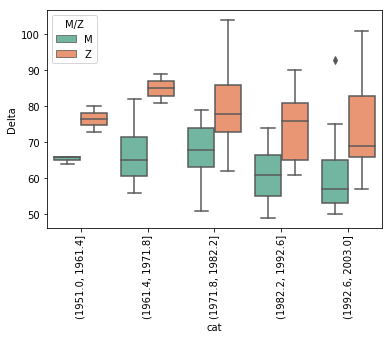

In [11]:
%matplotlib inline
#sns.boxplot(x=pd.Categorical(df['Ročník']), 
#            y=df["Delta"].astype('timedelta64[m]'), 
#            hue = df['M/Z'], data=df)
plt.xticks(rotation=90)                         # otočit popis stupnice osy y
sns.boxplot(x=df['cat'], 
            y=df["Delta"].astype('timedelta64[m]'), 
            hue = df['M/Z'], data=df, palette="Set2")
plt.show()

vykreslit violinplot

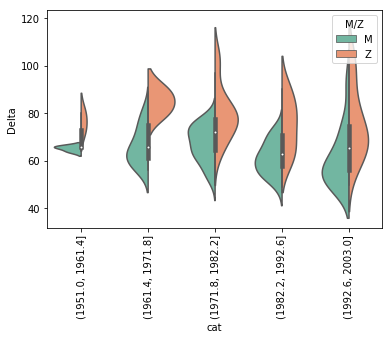

In [13]:
plt.xticks(rotation=90) 
sns.violinplot(x=df['cat'], y=df["Delta"].astype('timedelta64[m]'), 
               hue = df['M/Z'], data=df, split=True, palette="Set2")
plt.show()     

spočítat průměr a median

In [19]:
# spočítat průměr pro každou kategorii
print(df['Delta'].astype('timedelta64[m]').groupby(df['cat']).mean(), "\n")
# spočítá median pro kategorie rozdělené na M/Z
print(df['Delta'].astype('timedelta64[m]').groupby([df['cat'], df['M/Z']]).median(), "\n")
# rozdělit do dvou sloupců .unstack()
print(df['Delta'].astype('timedelta64[m]').groupby([df['cat'], df['M/Z']]).median().unstack(), "\n")
# nebo tato syntaxe 
print(df.groupby(['cat', 'M/Z'])[['Ročník']].mean().unstack())

cat
(1951.0, 1961.4]    69.800000
(1961.4, 1971.8]    68.470588
(1971.8, 1982.2]    72.072727
(1982.2, 1992.6]    65.379310
(1992.6, 2003.0]    67.269231
Name: Delta, dtype: float64 

cat               M/Z
(1951.0, 1961.4]  M      66.0
                  Z      76.5
(1961.4, 1971.8]  M      65.0
                  Z      85.0
(1971.8, 1982.2]  M      68.0
                  Z      78.0
(1982.2, 1992.6]  M      61.0
                  Z      76.0
(1992.6, 2003.0]  M      57.0
                  Z      69.0
Name: Delta, dtype: float64 

M/Z                  M     Z
cat                         
(1951.0, 1961.4]  66.0  76.5
(1961.4, 1971.8]  65.0  85.0
(1971.8, 1982.2]  68.0  78.0
(1982.2, 1992.6]  61.0  76.0
(1992.6, 2003.0]  57.0  69.0 

                       Ročník             
M/Z                         M            Z
cat                                       
(1951.0, 1961.4]  1957.333333  1959.500000
(1961.4, 1971.8]  1967.133333  1970.500000
(1971.8, 1982.2]  1975.970588  1977.238095
(